In [1]:
import numpy as np
import pandas as pd
import time
from matplotlib import pyplot as plt
from matplotlib import colors as mcolors
import pathlib
import gc

In [2]:
preselectionCuts = False
DTF_FixLambda_success = False
save_plots = False

# Import data

In [3]:
inputMC = '~/data/MAGUPDOWN_LHCbMC_Lb2JPsiL_150000.h5'

In [4]:
tickMC = time.perf_counter()
df_magup = pd.read_hdf(inputMC, key='LHCbMC_MagUp')
tockMC = time.perf_counter()
print(f"MagUp imported in {tockMC - tickMC:0.4f} seconds.")

MagUp imported in 0.5615 seconds.


In [5]:
tickMC = time.perf_counter()
df_magdown = pd.read_hdf(inputMC, key='LHCbMC_MagDown')
tockMC = time.perf_counter()
print(f"MagDown imported in {tockMC - tickMC:0.4f} seconds.")

MagDown imported in 0.3842 seconds.


In [6]:
df_magup['polarity'] = +1
df_magdown['polarity'] = -1

In [7]:
df_MC = pd.concat([df_magup, df_magdown], ignore_index=True)
df_MC

,Lb_ENDVERTEX_X,Lb_ENDVERTEX_Y,Lb_ENDVERTEX_Z,L_ENDVERTEX_X,L_ENDVERTEX_Y,L_ENDVERTEX_Z,Jpsi_ENDVERTEX_X,Jpsi_ENDVERTEX_Y,Jpsi_ENDVERTEX_Z,L_PX,...,DTF_FixJPsiLambda_p_PX,DTF_FixJPsiLambda_p_PY,DTF_FixJPsiLambda_p_PZ,DTF_FixJPsiLambda_mum_PX,DTF_FixJPsiLambda_mum_PY,DTF_FixJPsiLambda_mum_PZ,DTF_FixJPsiLambda_mup_PX,DTF_FixJPsiLambda_mup_PY,DTF_FixJPsiLambda_mup_PZ,polarity
0,0.531989,0.156184,-11.605191,-990.557041,-155.257567,7681.106228,0.5413,0.1391,-11.7045,-2907.631194,...,-1887.310059,-380.207001,15194.307617,-1832.290039,2593.689697,15837.026367,105.654060,505.930420,18315.517578,1
1,0.528757,-0.070308,-0.085964,-180.519168,-133.057595,7569.258412,0.5293,-0.0706,-0.0969,-1120.822842,...,-501.783936,-334.683899,19481.650391,-1671.411987,2109.168945,52271.304688,-3244.415283,77.359604,114952.445312,1
2,0.859428,-0.376049,29.521646,-82.626349,-331.621786,4814.597517,0.8603,-0.3764,29.5380,575.017171,...,25944.191406,335472.093750,-29351.548828,1171.606445,416.795837,35885.710938,1075.763550,-3006.148926,48975.242188,1
3,0.933587,-0.165953,-28.980723,113.230367,-74.224539,4443.563975,0.9336,-0.1660,-28.9808,3718.929704,...,3195.363281,-2206.699219,124287.414062,-1122.164551,-457.974670,19632.806641,2103.298584,-577.603638,41140.000000,1
4,0.836371,-0.127803,-36.125244,128.102391,-220.857899,4732.615341,0.8364,-0.1278,-36.1245,4125.442640,...,2817.289795,-4970.541016,106978.703125,2245.155029,-649.018433,46880.835938,-270.196167,-2255.452393,64421.699219,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
301052,0.693087,0.161095,-9.228824,-787.007198,548.588560,5853.543286,0.6931,0.1611,-9.2289,-4356.159842,...,-3213.135498,2278.319092,24381.718750,-7369.694336,-635.517334,43449.867188,-1201.545898,1172.940796,7525.177246,-1
301053,0.753417,-0.002298,-14.793441,21.250498,-4.316952,3031.993891,0.7537,-0.0023,-14.8037,-90.097113,...,278.848846,-513.100403,6167.202637,-4192.737305,-2763.680420,126089.742188,149.431015,-1026.803101,11773.846680,-1
301054,0.753258,-0.002924,-14.788568,86.891471,-39.930166,-1423.725797,0.7537,-0.0023,-14.8037,-1023.567382,...,-203.438934,113.273170,9373.682617,-4180.285156,-2764.142334,125823.976562,150.138474,-1027.975708,11765.769531,-1
301055,0.087698,-1.617397,-29.262196,-103.501726,-524.342132,4730.464616,0.0877,-1.6174,-29.2622,-683.906986,...,-636.507935,-3697.510986,33372.894531,-1241.493530,897.250183,22576.585938,-180.677841,-1534.416016,8429.802734,-1


In [8]:
## Cleanup
try:
    del(df_magup)
except NameError:
    pass

try:
    del(df_magdown)
except NameError:
    pass

gc.collect()

0

In [9]:
def MomentumModulus(px, py, pz):
    return np.sqrt(px**2 + py**2 + pz**2)

def TransverseMomentumModulus(px, py):
    return np.sqrt(px**2 + py**2)

In [10]:
if preselectionCuts:
    JPsi1SPDGMass = 3096.900

    PionPCuts = (MomentumModulus(df_MC['pim_PX'], df_MC['pim_PY'], df_MC['pim_PZ']) > 2000) & (MomentumModulus(df_MC['pim_PX'], df_MC['pim_PY'], df_MC['pim_PZ']) < 5e5)
    ProtonPCuts = (MomentumModulus(df_MC['p_PX'], df_MC['p_PY'], df_MC['p_PZ']) > 10000) & (MomentumModulus(df_MC['p_PX'], df_MC['p_PY'], df_MC['p_PZ']) < 5e5)
    ProtonPTCuts = TransverseMomentumModulus(df_MC['p_PX'], df_MC['p_PY']) > 400
    LambdaMCuts = (df_MC['L_M'] > 600) & (df_MC['L_M'] < 1500)
    LambdaMMCuts = df_MC['L_MM'] < 1500
    LambdaZCuts = (df_MC['L_ENDVERTEX_Z'] > 5500) & (df_MC['L_ENDVERTEX_Z'] < 8500)
    LambdaDiraCuts = (df_MC['L_BPVDIRA'] > 0.9999)
    LambdaBPVIPCHI2Cuts = df_MC['L_BPVIPCHI2'] < 200
    LambdaBPVVDCHI2Cuts = df_MC['L_BPVVDCHI2'] < 2e7
    LambdaChi2Cuts = df_MC['L_VFASPF_CHI2_VDOF'] < 750
    JPsiMCuts = abs(df_MC['Jpsi_M'] - JPsi1SPDGMass) < 90
    LambdaPTCuts = TransverseMomentumModulus(df_MC['L_PX'], df_MC['L_PY']) > 450
    LambdabMCuts = (df_MC['Lb_M'] < 8500)
    LambdabDiraCuts = abs(df_MC['Lb_BPVDIRA']) > 0.99
    LambdabBPVIPCHI2Cuts = df_MC['Lb_BPVIPCHI2'] < 1750
    LambdabChi2Cuts = df_MC['Lb_VFASPF_CHI2_VDOF'] < 150

    df_MC = df_MC.loc[
        PionPCuts &
        ProtonPCuts &
        ProtonPTCuts &
        LambdaMCuts &
        LambdaMMCuts &
        LambdaZCuts &
        LambdaDiraCuts &
        LambdaBPVIPCHI2Cuts &
        LambdaBPVVDCHI2Cuts &
        LambdaChi2Cuts &
        JPsiMCuts &
        LambdaPTCuts &
        LambdabMCuts &
        LambdabDiraCuts &
        LambdabBPVIPCHI2Cuts &
        LambdabChi2Cuts
    ]
    
    if DTF_FixLambda_success:
        DTFCuts = (df_MC['DTF_FixJPsiLambda_status'] == 'Success')
        df_MC = df_MC.loc[DTFCuts]

In [11]:
list(df_MC)

['Lb_ENDVERTEX_X',
 'Lb_ENDVERTEX_Y',
 'Lb_ENDVERTEX_Z',
 'L_ENDVERTEX_X',
 'L_ENDVERTEX_Y',
 'L_ENDVERTEX_Z',
 'Jpsi_ENDVERTEX_X',
 'Jpsi_ENDVERTEX_Y',
 'Jpsi_ENDVERTEX_Z',
 'L_PX',
 'L_PY',
 'L_PZ',
 'Lb_PX',
 'Lb_PY',
 'Lb_PZ',
 'Jpsi_PX',
 'Jpsi_PY',
 'Jpsi_PZ',
 'p_PX',
 'p_PY',
 'p_PZ',
 'pim_PX',
 'pim_PY',
 'pim_PZ',
 'mum_PX',
 'mum_PY',
 'mum_PZ',
 'mup_PX',
 'mup_PY',
 'mup_PZ',
 'Lb_ID',
 'L_ID',
 'Jpsi_ID',
 'mum_ID',
 'mup_ID',
 'p_ID',
 'pim_ID',
 'L_M',
 'L_MM',
 'Lb_M',
 'Lb_MM',
 'Jpsi_M',
 'Jpsi_MM',
 'Lb_BPVDIRA',
 'Lb_BPVIPCHI2',
 'Lb_BPVVDCHI2',
 'Lb_VFASPF_CHI2_VDOF',
 'L_BPVDIRA',
 'L_BPVIPCHI2',
 'L_BPVVDCHI2',
 'L_VFASPF_CHI2_VDOF',
 'Lb_OWNPV_X',
 'Lb_OWNPV_Y',
 'Lb_OWNPV_Z',
 'Lb_OWNPV_CHI2',
 'Lb_OWNPV_NDOF',
 'DTF_FixJPsi_status',
 'DTF_FixJPsi_Lb_M',
 'DTF_FixJPsi_Lb_P',
 'DTF_FixJPsi_chi2',
 'DTF_FixJPsi_nDOF',
 'DTF_FixJPsi_PV_key',
 'DTF_FixJPsi_PV_X',
 'DTF_FixJPsi_PV_Y',
 'DTF_FixJPsi_PV_Z',
 'DTF_FixJPsi_L_M',
 'DTF_FixJPsi_L_P',
 'DTF_FixJPsi_L_dec

# Search for asymmetries

## Plot settings

In [12]:
## Create plots directory, if missing
plotsDirectory = str(pathlib.Path.home()) + '/vertex-reconstruction-studies/plots/decay_reconstruction_asymmetry_analysis/'
pathlib.Path(plotsDirectory).mkdir(parents=True, exist_ok=True)

## Colors
fullColor = 'grey'
matterColor = 'tab:red'
antimatterColor = 'tab:green'

In [13]:
## series: a pandas.Series to plot, e.g. a column of a data frame
## matterCharge: either 'matter', 'antimatter' or 'both'
## polarity: either +1 or -1 (up and down respectively) or 'both'
## plotTitle: title of the plot (no way)
## seriesLabel: the label for the x-axis
## seriesFileName: the name of the plot file (after prefixes)
## binning: no. of bins.
## boundaries: range of the histogram (2-ple)
## scale: argument for plt.yscale()
## scientificNotation: if True, use scientific notation for x axis
def PlotSingleHistogram(
    series,
    matterCharge,
    polarity,
    plotTitle,
    seriesLabel,
    seriesFileName,
    binning,
    boundaries,
    scale='linear',
    scientificNotation=False
):
    
    if matterCharge == 'matter':
        matterChargeCut = (df_MC['p_ID'] == 2212)
        customColor = matterColor
        matterSubtitle = "Only $\Lambda_b$ decays"
        matterPrefix = 'matter'
    elif matterCharge == 'antimatter':
        matterChargeCut = (df_MC['p_ID'] == -2212)
        customColor = antimatterColor
        matterSubtitle = "Only anti-$\Lambda_b$ decays"
        matterPrefix = 'antimatter'
    elif matterCharge == 'both':
        matterChargeCut = (pd.Series(True,index=df_MC.index))
        customColor = fullColor
        matterSubtitle = "$\Lambda_b$ + anti-$\Lambda_b$ decays"
        matterPrefix = 'allmatter'
    else:
        raise ValueError("Argument matterCharge must be either 'matter', 'antimatter' or 'both'.")
        
    if polarity == 'both':
        polarityCut = (pd.Series(True,index=df_MC.index))
        polaritySubtitle = "MagUp & MagDown"
        polarityPrefix = 'MagUpDown'
    elif polarity in [1,-1]:
        polarityCut = (df_MC['polarity'] == polarity)
        if polarity == 1:
            polaritySubtitle = "MagUp only"
            polarityPrefix = 'MagUp'
        else:
            polaritySubtitle = "MagDown only"
            polarityPrefix = 'MagDown'
    else:
        raise ValueError("Argument polarity must be either +1, -1, or 'both'.")
    
    variables = series.loc[matterChargeCut & polarityCut]
    
    plt.hist(variables,
             bins=binning,
             range=boundaries,
             histtype='stepfilled',
             edgecolor=customColor,
             color=mcolors.to_rgba(customColor, alpha=0.1)
    )
    
    plt.axvline(x=0,ymin=0,ymax=10000,linestyle='--',color='k')
    
    plt.grid()
    plt.xlabel(seriesLabel)
    plt.title(plotTitle + "\n" + "(" + matterSubtitle + ", " + polaritySubtitle + ")")
    plt.yscale(scale)
    plt.ylabel("Events")
    if scientificNotation:
        plt.ticklabel_format(axis="x", style="sci", scilimits=(0,0))
    if save_plots:
        plt.savefig(plotsDirectory + matterPrefix + "_" + polarityPrefix + "_" + seriesFileName + '.pdf', bbox_inches='tight')
    plt.show()

## Proton momentum

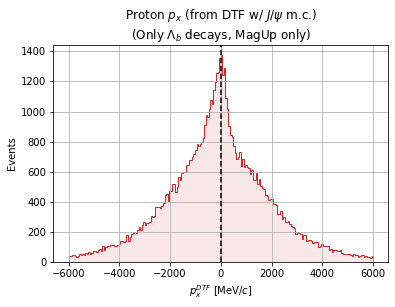

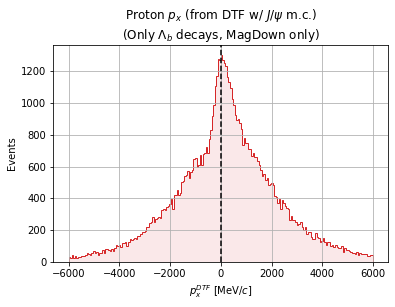

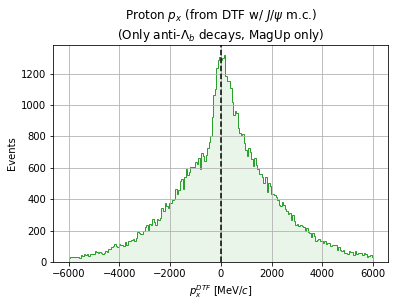

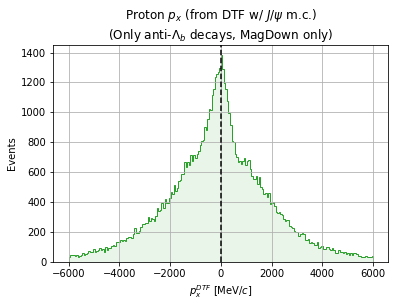

In [14]:
for matterCharge in ['matter', 'antimatter']:
    for polarity in [+1, -1]:
        plotArgs = {
            "matterCharge": matterCharge,
            "polarity": polarity,
            "seriesLabel": "$p_x^{DTF}$ [MeV/$c$]",
            "plotTitle": "Proton $p_x$ (from DTF w/ $J/\psi$ m.c.)",
            "seriesFileName": "p_PX_DTF",
            "scale": "linear",
            "binning": 200,
            "boundaries": (-6000,6000),
            "scientificNotation": False    
        }
        
        PlotSingleHistogram(df_MC['DTF_FixJPsi_p_PX'], **plotArgs)
#PlotOverlappingHistograms(**plotArgs)

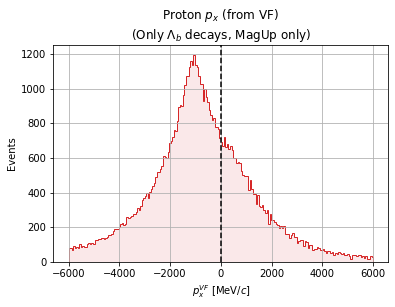

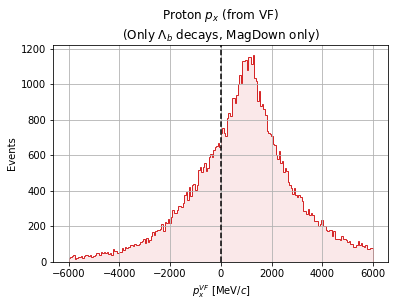

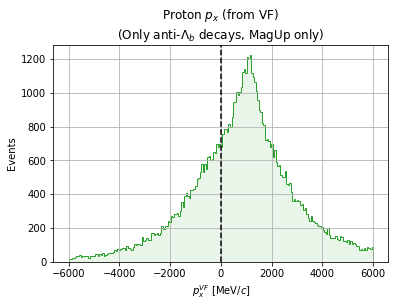

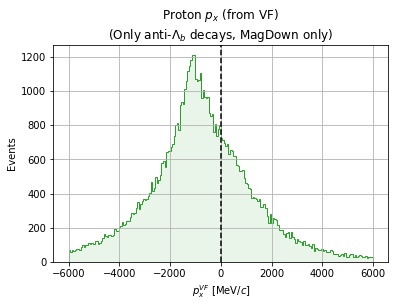

In [15]:
for matterCharge in ['matter', 'antimatter']:
    for polarity in [+1, -1]:
        plotArgs = {
            "matterCharge": matterCharge,
            "polarity": polarity,
            "seriesLabel": "$p_x^{VF}$ [MeV/$c$]",
            "plotTitle": "Proton $p_x$ (from VF)",
            "seriesFileName": "p_PX_VF",
            "scale": "linear",
            "binning": 200,
            "boundaries": (-6000,6000),
            "scientificNotation": False    
        }
        
        PlotSingleHistogram(df_MC['p_PX'], **plotArgs)
#PlotOverlappingHistograms(**plotArgs)

## Horizontality

In [16]:
def RowAVec(row):
    return np.cross(row['p_DTF_pvec'], row['pim_DTF_pvec'])

def RowANorm(row):
    return np.linalg.norm(row['DTF_FixJpsi_avec'])

In [17]:
df_MC['p_DTF_pvec'] = list(zip(df_MC.DTF_FixJPsi_p_PX, df_MC.DTF_FixJPsi_p_PY, df_MC.DTF_FixJPsi_p_PZ))
df_MC['pim_DTF_pvec'] = list(zip(df_MC.DTF_FixJPsi_pim_PX, df_MC.DTF_FixJPsi_pim_PY, df_MC.DTF_FixJPsi_pim_PZ))

In [18]:
df_MC['DTF_FixJpsi_avec'] = df_MC.apply(lambda row: RowAVec(row), axis=1)
df_MC['DTF_FixJpsi_anorm'] = df_MC.apply(lambda row: RowANorm(row), axis=1)

In [19]:
def Feature1DComponent(series, component):
    return series.map(lambda x: x[component])

In [20]:
df_MC['DTF_FixJpsi_ahat'] = df_MC['DTF_FixJpsi_avec']/df_MC['DTF_FixJpsi_anorm']
df_MC['DTF_FixJpsi_h'] = Feature1DComponent(df_MC['DTF_FixJpsi_ahat'], 1) * df_MC['polarity'] * np.sign(df_MC['L_ID'])

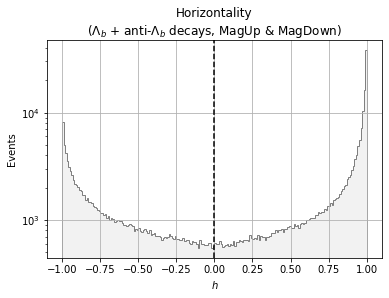

In [21]:
plotArgs = {
    "matterCharge": 'both',
    "polarity": 'both',
    "seriesLabel": "$h$",
    "plotTitle": "Horizontality",
    "seriesFileName": "horizontality",
    "scale": "log",
    "binning": 200,
    "boundaries": (-1,1),
    "scientificNotation": False    
}
       
PlotSingleHistogram(df_MC['DTF_FixJpsi_h'], **plotArgs)